<a href="https://colab.research.google.com/github/PauForestal/master_bdds/blob/main/M2_AI1_VallejoPaula.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
%matplotlib inline

---

**LECTURA Y PRIMERA REVISIÓN DEL DATAFRAME**


---

In [2]:
archivo = 'https://raw.githubusercontent.com/md-lorente/data/master/precio_gasolina.csv'
df = pd.read_csv(archivo, sep = ';', decimal = ',', header = 'infer')

In [3]:
df.head()

,Provincia,Localidad,Codigo_postal,Direccion,Margen,Toma_de_datos,Precio,Rotulo,Tipo_venta,Rem,Horario,Tipo_servicio,Fecha_extraccion
0,SANTA CRUZ DE TENERIFE,CUESTA LA,38320,AVENIDA LOS MENCEYES 223,D,01 08 2020 1353,0.758,PCAN,P,dm,LD 24H,LD 24H A,01 08 2020
1,SANTA CRUZ DE TENERIFE,LA LAGUNA,38200,CARRETERA TF111 KM 8 346,D,01 08 2020 0900,0.759,OCEANO,P,dm,LS 06002200 D 07002200,LS 06002200 A D 07002200 A,01 08 2020
2,SANTA CRUZ DE TENERIFE,SANTA CRUZ DE TENERIFE,38110,CALLE LAURA GROTE DE LA PUERTA 2,D,27 07 2020 1202,0.769,GMOIL,P,dm,LV 24H S 06002000 D 08001500,LV 24H A S 06002000 A D 08001500 A,01 08 2020
3,SANTA CRUZ DE TENERIFE,SANTA CRUZ DE TENERIFE,38010,POLIGONO EL MAYORAZGO SN,N,29 07 2020 0000,0.789,TGASTU TREBOL,P,dm,LS 07302100 D 08001400,LS 07302100 A D 08001400 A,01 08 2020
4,SANTA CRUZ DE TENERIFE,ADEJE,38670,CALLE CHARFA ESQUINA AVENIDA LAS PALMITAS SN,D,27 07 2020 1159,0.789,GMOIL,P,dm,LS 07002200 D 09001600,LS 07002200 A D 09001600 A,01 08 2020


In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9991 entries, 0 to 9990
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Provincia         9991 non-null   object 
 1   Localidad         9991 non-null   object 
 2   Codigo_postal     9991 non-null   int64  
 3   Direccion         9991 non-null   object 
 4   Margen            9991 non-null   object 
 5   Toma_de_datos     9991 non-null   object 
 6   Precio            9991 non-null   float64
 7   Rotulo            9990 non-null   object 
 8   Tipo_venta        9991 non-null   object 
 9   Rem               9991 non-null   object 
 10  Horario           9991 non-null   object 
 11  Tipo_servicio     9845 non-null   object 
 12  Fecha_extraccion  9991 non-null   object 
dtypes: float64(1), int64(1), object(11)
memory usage: 1014.8+ KB
None


> En una primera revisión, al realizar df.info, se observa que sólo dos variables son numéricas (tanto integer como float), el resto de variables están todas como object lo que podría indicar que son categóricas o cualitativas. Para poder ahondar en este tema, realizaré una copia del dataframe y analizaré en primera instancia bajo el supuesto que esta descripción es correcta.

In [27]:
df_numeric = df.select_dtypes(exclude=['object']).copy()

In [28]:
df_numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9991 entries, 0 to 9990
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Codigo_postal  9991 non-null   int64  
 1   Precio         9991 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 156.2 KB


---

**ANALISIS POR VARIABLES**


---

In [32]:
n_categorias = df_numeric['Codigo_postal'].value_counts().count()
tabla_frecuencia = df_numeric['Codigo_postal'].value_counts()

print(f"La cantidad de categorías de la variable Codigo_postal es: {n_categorias}. Su tabla de frecuencias se observa a continuación:\n{tabla_frecuencia}")

La cantidad de categorías de la variable Codigo_postal es: 4198. Su tabla de frecuencias se observa a continuación:
41500    23
11500    22
4700     21
11130    21
30500    20
         ..
36612     1
36670     1
36890     1
33570     1
18860     1
Name: Codigo_postal, Length: 4198, dtype: int64


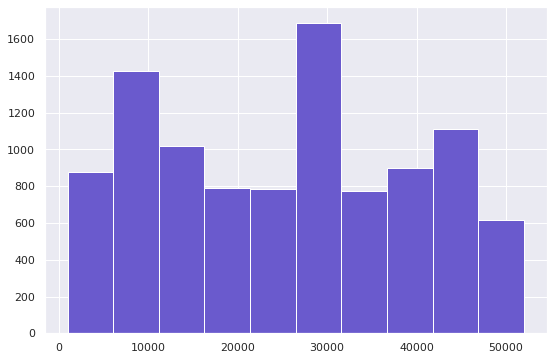

In [31]:
plt.figure(figsize=[9, 6])
df.Codigo_postal.hist(color='slateblue');

**ANALISIS DE LA VARIABLE CÓDIGO POSTAL**


---


> Es interesante observar que la variable "Codigo_postal" está compuesta por números pero realmente no aporta información de manera cuantitativa. Es imaposible realizar un análisis de ella como tal ya que el número que la compone representa una esquema que se asigna a distintas zonas o lugares de un país con el objetivo de mecanizar el correo.

Dicho lo anterior, esta variable es una variable categórica o cualitativa de tipo ordinal.



In [5]:
df_categorical = df.select_dtypes(include=['object']).copy()

In [6]:
print(df_categorical.isnull().sum())

Provincia             0
Localidad             0
Direccion             0
Margen                0
Toma_de_datos         0
Rotulo                1
Tipo_venta            0
Rem                   0
Horario               0
Tipo_servicio       146
Fecha_extraccion      0
dtype: int64


In [7]:
df_categorical = df_categorical.fillna(df_categorical['Tipo_servicio'].value_counts().index[0])

In [8]:
print(df_categorical.isnull().sum())

Provincia           0
Localidad           0
Direccion           0
Margen              0
Toma_de_datos       0
Rotulo              0
Tipo_venta          0
Rem                 0
Horario             0
Tipo_servicio       0
Fecha_extraccion    0
dtype: int64


In [9]:
for k,v in df_categorical.items():
    df_categorical[k] = df_categorical[k].str.strip()

In [10]:
n_categorias = df_categorical['Provincia'].value_counts().count()
tabla_frecuencia = df_categorical['Provincia'].value_counts()

print(f"La cantidad de categorías de la variable Provincia es: {n_categorias}. Su tabla de frecuencias se observa a continuación:\n{tabla_frecuencia}")

La cantidad de categorías de la variable Provincia es: 52. Su tabla de frecuencias se observa a continuación:
MADRID                    730
BARCELONA                 723
VALENCIA                  568
ALICANTE                  408
SEVILLA                   385
MURCIA                    384
MALAGA                    296
CORUNA A                  257
GRANADA                   250
CADIZ                     244
GIRONA                    243
TOLEDO                    235
PALMAS LAS                231
JAEN                      225
SANTA CRUZ DE TENERIFE    223
TARRAGONA                 212
ZARAGOZA                  212
BADAJOZ                   207
ASTURIAS                  203
NAVARRA                   202
CORDOBA                   195
BALEARS ILLES             194
ALMERIA                   184
PONTEVEDRA                184
CIUDAD REAL               183
CASTELLON  CASTELLO       172
LLEIDA                    166
LEON                      159
CANTABRIA                 143
ALBACETE            

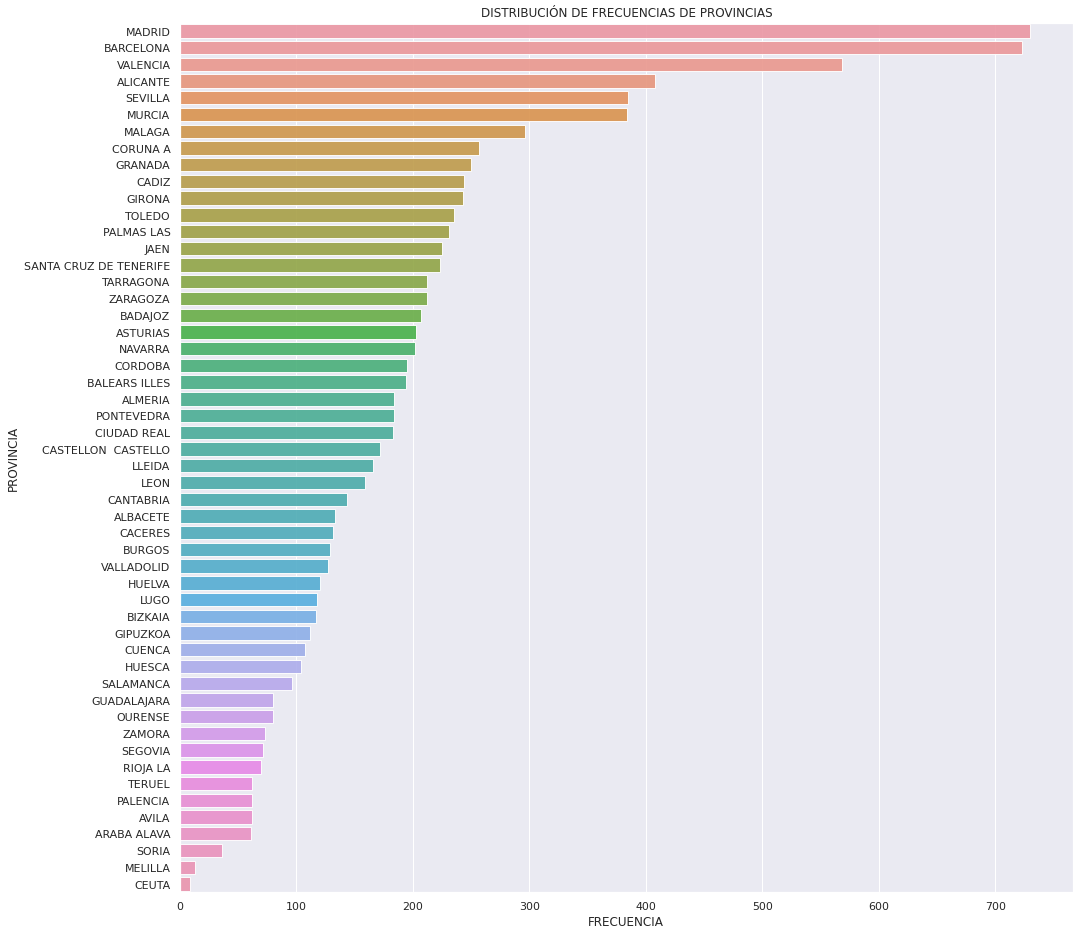

In [11]:
plt.figure(figsize=[16, 16])
sns.set(style="darkgrid")

provincia_count = df_categorical['Provincia'].value_counts()
sns.barplot(x=provincia_count.values, y=provincia_count.index, alpha=0.9);
plt.title('DISTRIBUCIÓN DE FRECUENCIAS DE PROVINCIAS');
plt.ylabel('PROVINCIA', fontsize=12);
plt.xlabel('FRECUENCIA', fontsize=12);

In [12]:
df_categorical.Localidad.unique()

array(['CUESTA LA', 'LA LAGUNA', 'SANTA CRUZ DE TENERIFE', ...,
       'MONTSENY', 'VERGER EL', 'BAUL'], dtype=object)

In [13]:
n_categorias = df_categorical['Localidad'].value_counts().count()
tabla_frecuencia = df_categorical['Localidad'].value_counts()

print(f"La cantidad de categorías de la variable Localidad es: {n_categorias}. Su tabla de frecuencias se observa a continuación:\n{tabla_frecuencia}")

La cantidad de categorías de la variable Localidad es: 3829. Su tabla de frecuencias se observa a continuación:
MADRID       203
BARCELONA     85
SEVILLA       65
VALENCIA      58
MALAGA        54
            ... 
LIENDO         1
VEREA          1
BANDE          1
VALEIXE        1
BAUL           1
Name: Localidad, Length: 3829, dtype: int64


In [14]:
n_categorias = df_categorical['Direccion'].value_counts().count()
tabla_frecuencia = df_categorical['Direccion'].value_counts()

print(f"La cantidad de categorías de la variable Dirección es: {n_categorias}. Su tabla de frecuencias se observa a continuación:\n{tabla_frecuencia}")

La cantidad de categorías de la variable Dirección es: 9697. Su tabla de frecuencias se observa a continuación:
AVENIDA ANDALUCIA SN                                        11
AVENIDA JUAN CARLOS I SN                                     7
AVENIDA CONSTITUCION SN                                      5
AVENIDA DEL MEDITERRANEO SN                                  4
AVENIDA PORTUGAL SN                                          3
                                                            ..
POLIGONO POLIGONO INDUSTRIAL EL CERRO LUZ DE CASTILLA SN     1
AVENIDA FEDERICO SILVA MUNOZ 21                              1
CR N631 43 4                                                 1
CARRETERA N620 KM 307 000                                    1
AUTOVIA A92 KM 322                                           1
Name: Direccion, Length: 9697, dtype: int64


In [15]:
n_categorias = df_categorical['Margen'].value_counts().count()
tabla_frecuencia = df_categorical['Margen'].value_counts()

print(f"La cantidad de categorías de la variable Margen es: {n_categorias}. Su tabla de frecuencias se observa a continuación:\n{tabla_frecuencia}")

La cantidad de categorías de la variable Margen es: 3. Su tabla de frecuencias se observa a continuación:
D    5016
I    2596
N    2379
Name: Margen, dtype: int64


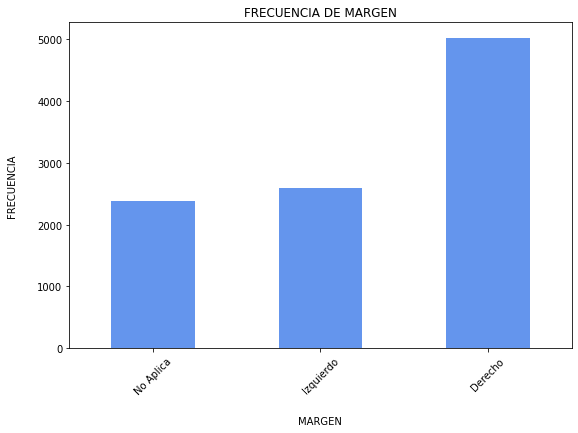

In [146]:
plt.figure(figsize=[9, 6])

ax = df.Margen.value_counts().sort_values().plot(kind = 'bar', color='cornflowerblue', align='center');
ax.set_xlabel('MARGEN', labelpad=20)
ax.set_ylabel('FRECUENCIA', labelpad=20)
ax.set_title('FRECUENCIA DE MARGEN')
ax.set_xticklabels(['No Aplica','Izquierdo','Derecho'], rotation = 45);

In [16]:
n_categorias = df_categorical['Toma_de_datos'].value_counts().count()
tabla_frecuencia = df_categorical['Toma_de_datos'].value_counts().sort_index()

print(f"La cantidad de categorías de la variable Toma_de_datos es: {n_categorias}. Su tabla de frecuencias se observa a continuación:\n{tabla_frecuencia}")

La cantidad de categorías de la variable Toma_de_datos es: 2800. Su tabla de frecuencias se observa a continuación:
01 08 2020 0000    2857
01 08 2020 0001      32
01 08 2020 0003       1
01 08 2020 0005       3
01 08 2020 0024       1
                   ... 
31 07 2020 2305       1
31 07 2020 2316       1
31 07 2020 2317       1
31 07 2020 2330       2
31 07 2020 2359       1
Name: Toma_de_datos, Length: 2800, dtype: int64


In [19]:
n_categorias = df_categorical['Rotulo'].value_counts().count()
tabla_frecuencia = df_categorical['Rotulo'].value_counts().head(50)

print(f"La cantidad de categorías de la variable Rotulo es: {n_categorias}.\n\nSu tabla de frecuencias se observa a continuación:\n{tabla_frecuencia}")

La cantidad de categorías de la variable Rotulo es: 2817.

Su tabla de frecuencias se observa a continuación:
REPSOL              2707
CEPSA               1335
GALP                 519
SHELL                373
BP                   219
PETRONOR             182
AVIA                 153
CARREFOUR            142
BALLENOIL            123
CAMPSA                98
Q8                    83
PETROPRIX             75
ESCLATOIL             51
BONAREA               51
AGLA                  47
VALCARCE              44
ALCAMPO               42
EROSKI                42
MEROIL                41
PLENOIL               40
GASEXPRESS            38
DISA                  31
TAMOIL                28
IBERDOEX              23
PETROCAT              22
BEROIL                20
SIN ROTULO            18
PETROCAT DIRECTE      17
PCAN                  17
BP OIL                16
E LECLERC             16
CAMPSA EXPRESS        15
AUTONET&OIL           14
BDMED                 13
EASYGAS               13
CONFORT AUTO   

In [20]:
n_categorias = df_categorical['Tipo_venta'].value_counts().count()
tabla_frecuencia = df_categorical['Tipo_venta'].value_counts()

print(f"La cantidad de categorías de la variable Tipo_venta es: {n_categorias}. Su tabla de frecuencias se observa a continuación:\n{tabla_frecuencia}")

La cantidad de categorías de la variable Tipo_venta es: 5. Su tabla de frecuencias se observa a continuación:
P    9772
R     168
A      43
p       6
N       2
Name: Tipo_venta, dtype: int64


In [21]:
n_categorias = df_categorical['Rem'].value_counts().count()
tabla_frecuencia = df_categorical['Rem'].value_counts()

print(f"La cantidad de categorías de la variable Rem es: {n_categorias}. Su tabla de frecuencias se observa a continuación:\n{tabla_frecuencia}")

La cantidad de categorías de la variable Rem es: 2. Su tabla de frecuencias se observa a continuación:
dm    6286
OM    3705
Name: Rem, dtype: int64


In [22]:
n_categorias = df_categorical['Horario'].value_counts().count()
tabla_frecuencia = df_categorical['Horario'].value_counts().sort_index().head(10)

print(f"La cantidad de categorías de la variable Horario es: {n_categorias}. Su tabla de frecuencias se observa a continuación:\n{tabla_frecuencia}")

La cantidad de categorías de la variable Horario es: 1309. Su tabla de frecuencias se observa a continuación:
D 07002100     1
D 07002300     1
D 08002000     1
L 00052300     1
L 04002200     1
L 05000000     1
L 05002300     1
L 05300030     1
L 05302230     1
L 06000000    13
Name: Horario, dtype: int64


In [23]:
n_categorias = df_categorical['Tipo_servicio'].value_counts().count()
tabla_frecuencia = df_categorical['Tipo_servicio'].value_counts().head(10)

print(f"La cantidad de categorías de la variable Tipo_servicio es: {n_categorias}. Su tabla de frecuencias se observa a continuación:\n{tabla_frecuencia}")

La cantidad de categorías de la variable Tipo_servicio es: 1613. Su tabla de frecuencias se observa a continuación:
LD 24H  A         3464
LD 06002200  A    1180
LD 07002300  A     616
LD 07002200  A     234
LD 06002300  A     214
LD 07002300  P     160
LD 24H  D          129
LD 06002359  A     122
LD 06302230  A     121
LD 06002200  P     113
Name: Tipo_servicio, dtype: int64


In [24]:
n_categorias = df_categorical['Fecha_extraccion'].value_counts().count()
tabla_frecuencia = df_categorical['Fecha_extraccion'].value_counts()

print(f"La cantidad de categorías de la variable Fecha_extraccion es: {n_categorias}. Su tabla de frecuencias se observa a continuación:\n{tabla_frecuencia}")

La cantidad de categorías de la variable Fecha_extraccion es: 1. Su tabla de frecuencias se observa a continuación:
01 08 2020    9991
Name: Fecha_extraccion, dtype: int64


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


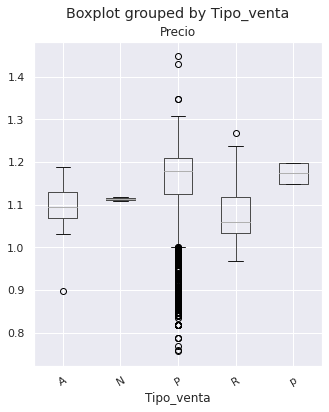

In [236]:
df.boxplot('Precio', 'Tipo_venta', rot = 30, figsize=(5,6));

In [153]:
# Cálculo del número de intervalos, según la regla de Sturges
k = 1 + 3.322 * math.log10(len(df))
k = round(k,0)
k

14.0

In [145]:
df.Precio.value_counts(bins=14).sort_index()

(0.756, 0.807]       6
(0.807, 0.857]      29
(0.857, 0.906]     112
(0.906, 0.955]      86
(0.955, 1.004]     240
(1.004, 1.054]     456
(1.054, 1.103]    1124
(1.103, 1.152]    1427
(1.152, 1.202]    3721
(1.202, 1.251]    2543
(1.251, 1.3]       241
(1.3, 1.349]         4
(1.349, 1.399]       0
(1.399, 1.448]       2
Name: Precio, dtype: int64

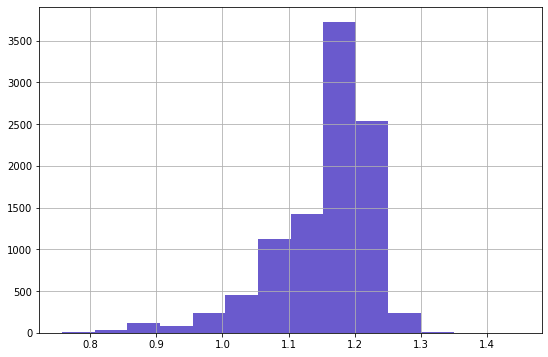

In [152]:
plt.figure(figsize=[9, 6])
df.Precio.hist(color='slateblue', bins=14);

In [158]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9991 entries, 0 to 9990
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Provincia         9991 non-null   object 
 1   Localidad         9991 non-null   object 
 2   Codigo_postal     9991 non-null   int64  
 3   Direccion         9991 non-null   object 
 4   Margen            9991 non-null   object 
 5   Toma_de_datos     9991 non-null   object 
 6   Precio            9991 non-null   float64
 7   Rotulo            9990 non-null   object 
 8   Tipo_venta        9991 non-null   object 
 9   Rem               9991 non-null   object 
 10  Horario           9991 non-null   object 
 11  Tipo_servicio     9845 non-null   object 
 12  Fecha_extraccion  9991 non-null   object 
dtypes: float64(1), int64(1), object(11)
memory usage: 1014.8+ KB


In [ ]:
Debes crear las sentencias necesarias en Python para resolver las siguientes tareas:

Identifica el tipo de variables. 
Identifica la clasificación a la que corresponden las variables.
Identifica el tipo de variables que sería desde el punto de vista del análisis de datos.
Crear una tabla de frecuencias y el gráfico correspondiente para las variables siguientes: provincia, margen y precio.
Comenta y justifica todos los resultados obtenidos en cada apartado.